# SMAI Assignment - 2

## Question - `2` : Face Recognition using Principal Component Analysis

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `16.02.2023` |
| Due Date | `24.02.2023` |

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

!unzip Datasets.zip

Archive:  Datasets.zip
   creating: Datasets/
   creating: Datasets/Testing/
   creating: Datasets/Testing/s1/
  inflating: Datasets/Testing/s1/1.pgm  
   creating: Datasets/Testing/s10/
  inflating: Datasets/Testing/s10/10.pgm  
   creating: Datasets/Testing/s11/
  inflating: Datasets/Testing/s11/11.pgm  
   creating: Datasets/Testing/s12/
  inflating: Datasets/Testing/s12/12.pgm  
   creating: Datasets/Testing/s13/
  inflating: Datasets/Testing/s13/13.pgm  
   creating: Datasets/Testing/s14/
  inflating: Datasets/Testing/s14/14.pgm  
   creating: Datasets/Testing/s15/
  inflating: Datasets/Testing/s15/15.pgm  
   creating: Datasets/Testing/s16/
  inflating: Datasets/Testing/s16/16.pgm  
   creating: Datasets/Testing/s17/
  inflating: Datasets/Testing/s17/17.pgm  
   creating: Datasets/Testing/s18/
  inflating: Datasets/Testing/s18/18.pgm  
   creating: Datasets/Testing/s19/
  inflating: Datasets/Testing/s19/19.pgm  
   creating: Datasets/Testing/s2/
  inflating: Datasets/Testing/s2/2

### <b>Objective:</b>
This question requires you to create a basic facial recognition system using a technique called principal component analysis (PCA) 
by projecting the face images on the feature space (face space) which best
represents the variations among distinct faces. The face space is defined as the
“Eigenfaces", which are the eigenvectors of the set of faces.

The goal of implementing this system is to recognize a person's face by comparing it to a pre-existing database of faces, and identifying the closest match.

Link to paper on Eigenfaces: [https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf](https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf)

### <b>About the dataset:</b>  
The AT&T face dataset contains a set of grayscale face images with dimensions 92x112. The images are organised in 40 directories (one for each subject), which have names of the form sX, where X indicates the subject number (between 1 and 40). In each of these directories, there are ten different images of that subject, which have names of the form Y.pgm, where Y is the image number for that subject (between 1 and 10). These 10 images per person are taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement). <b>Link:</b> [https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/](https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/)



### Tasks
1. Load dataset and divide the date into training and test sets. 
2. Implement the PCA algorithm from scratch.
3. Implement image reconstruction using the eigen projections and visualise differences for different number of components.
4. Visualise the mean(Eigen face) generated.
5. Given training set, obtain accuracy by attempting a face regonition module and obtaining the accuracy for different number of principal components.


#### Import Libraries

In [3]:
from sklearn.metrics import mean_squared_error
from scipy.linalg import eigh
import cv2
import os
import glob
import numpy as np
import pandas as pd
from scipy.linalg import eigh
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

#### Import Dataset
Assign labels for the images based on the subdirectories to obtain X(images array) and y (labels).

Ensure that the test data contains atleast one image from each category.

In [4]:
img_dir = "./Datasets/Training/*"
# img_dir = "./content/Datasets.zip/Training"
data_path = os.path.join(img_dir,'*.pgm')
total_files = glob.glob(data_path)
data = []
label = []
ind=1
class_label=1
for file in total_files:
    img = cv2.imread(file,0)
    label.append(class_label)
    if(ind==9):
        ind=0
        class_label+=1
    ind+=1
    data.append(img)

# print(data)

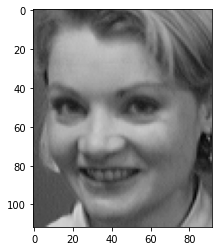

In [5]:
plt.imshow(data[0], cmap='gray', vmin=0, vmax=255)
plt.show()

In [6]:
flatten_array=[]
tmp_data=[]
for i in range(len(data)):
    temp = data[i].flatten()
    tmp_data.append(temp)
    flatten_array.append(temp)

flatten_array=np.asarray(flatten_array)
tmp_data = np.asarray(tmp_data)
np.set_printoptions(precision=3)

#### Implement PCA Algorithm.

Explain your steps with comments and write a brief explanation of the method.

ANS :- 

The principal components are calculated by finding the eigenvectors of the covariance matrix of the original data. The eigenvectors represent the directions along which the data varies the most. The eigenvalues associated with the eigenvectors represent the amount of variance explained by each principal component.


By selecting only the top principal components that explain most of the variance in the data, PCA can reduce the dimensionality of the dataset while preserving most of the important information. This can make it easier to analyze and visualize the data, and can also improve the performance of machine learning models.

In [7]:
"""
Implement pca in the following function by taking the following arguements:
1. X(images array)
2. number of components
The function must return the eigen vectors (principal components) also termed "Eigen faces"
"""

def principalComponentAnalysis(array):
    covariance_matrix = np.cov(array.T)
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    sorted_order = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_order]
    sorted_eigenvectors = eigenvectors[:, sorted_order]
    return sorted_eigenvectors


In [8]:

def get_eigen_vectors(eigen_vectors, number_of_compoonents):
    extra_eigen_vectors = eigen_vectors[:, :number_of_compoonents]
    matrix = np.dot(flatten_array, extra_eigen_vectors)
    print(matrix.shape)
    return extra_eigen_vectors, matrix


In [9]:

number_of_compoonents=190
eigen_vec = principalComponentAnalysis(flatten_array)
extra_eigen_vectors, matrix = get_eigen_vectors(eigen_vec, number_of_compoonents)
# print("extra_eigen_vectors :", extra_eigen_vectors)

(360, 190)


#### Implement Image Reconstruction from Eigenfaces


ANS:- 

To reconstruct a new face image, the first step is to project the new image onto the eigenfaces. This is done by calculating the dot product between the vectorized new image and each eigenface. The resulting coefficients represent the contribution of each eigenface to the new image.

The next step is to reconstruct the new image using only a subset of the eigenfaces that account for most of the variance in the dataset. This can be done by multiplying the subset of eigenfaces by their corresponding coefficients and adding them up. The resulting vector represents the reconstructed new image.

The reconstructed new image may not be an exact replica of the original image, but it should be a close approximation that captures the main features of the face.

Explain your steps with comments and write a brief explanation of the method.

In [10]:

def imageReconstruction(extra_eigen_vectors, matrix, image):
    reconstructed_image = np.dot(matrix[image], extra_eigen_vectors.T)
    reshaped_image = reconstructed_image.reshape((112, 92))
    plt.imshow(reshaped_image, cmap='gray', vmin=0, vmax=255)
    plt.show()

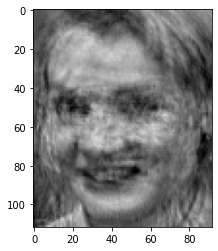

In [11]:
imageReconstruction(extra_eigen_vectors,matrix,0)

#### Visualisation
Visualise the results for different number of principal components(pc = 5,10,100, 1000, all).

**Note:** Ensure that the images are labelled appropriately.

(360, 5)


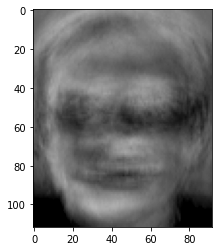

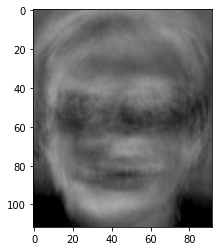

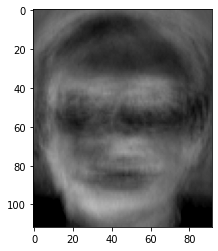

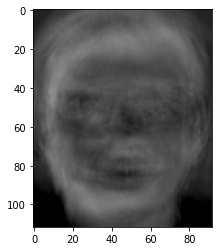

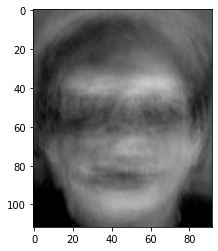

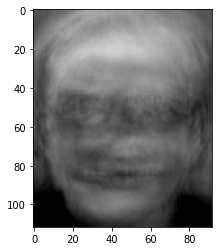

(360, 10)


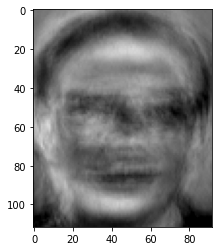

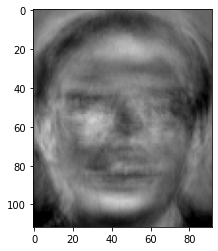

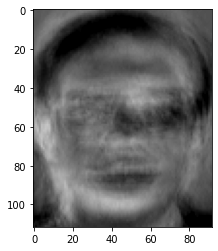

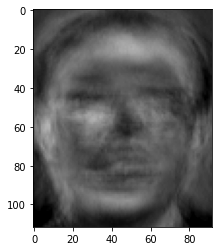

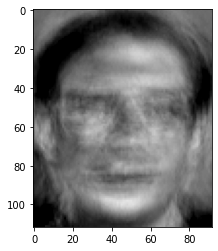

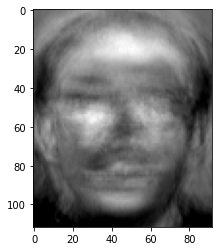

(360, 100)


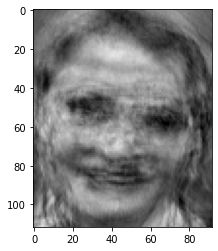

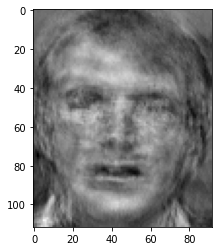

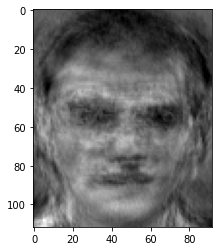

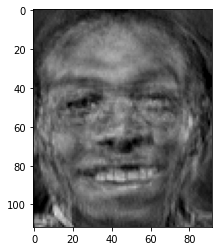

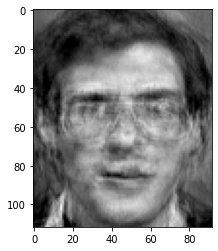

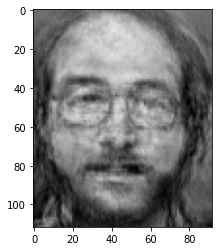

(360, 1000)


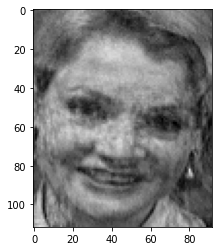

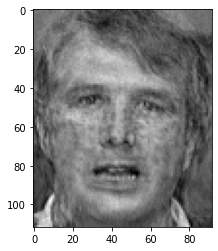

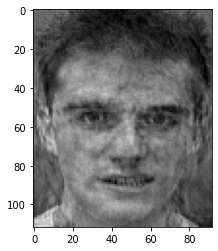

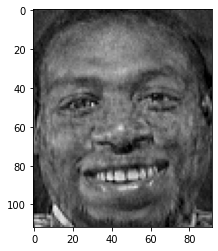

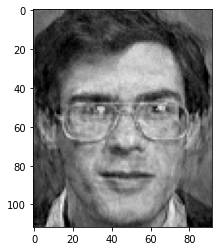

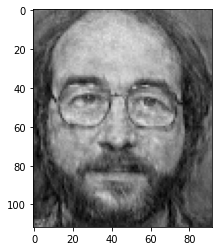

(360, 5000)


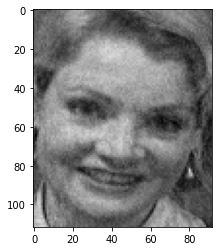

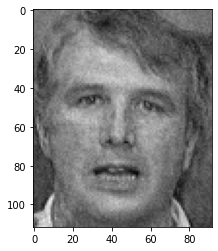

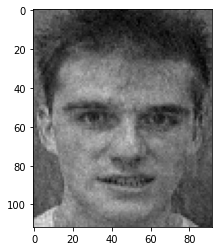

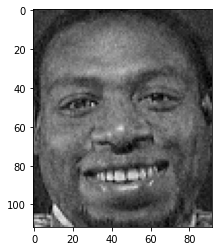

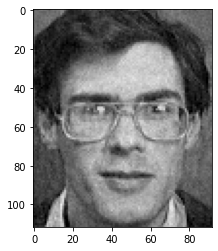

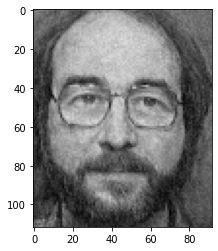

(360, 10000)


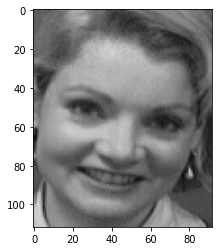

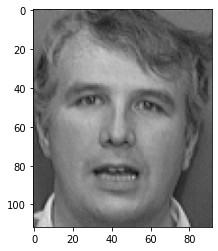

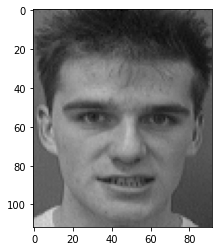

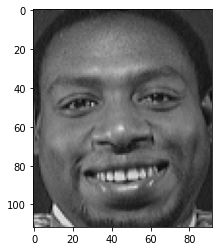

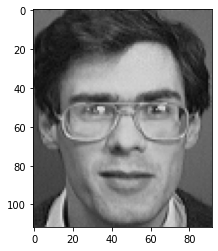

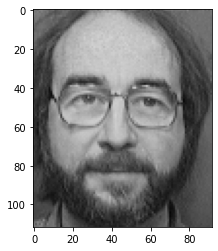

In [12]:

principal_components = [5,10,100,1000,5000,10000]
for component in principal_components:
    extra_eigen_vec_1, recreated_matrix1 = get_eigen_vectors(eigen_vec,component)
    for img in range(1, 60, 10):
        imageReconstruction(extra_eigen_vec_1, recreated_matrix1, img)

In [13]:

img_dir = "./Datasets/Testing/*"
data_path_test = os.path.join(img_dir,'*.pgm')
total_test_files = glob.glob(data_path_test)
test_data = []
for index in total_test_files:
    img = cv2.imread(index,0)
    test_data.append(img)

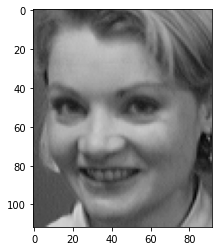

In [14]:
plt.imshow(data[0], cmap='gray', vmin=0, vmax=255)
plt.show()

#### Implement face recognition module based on the norm
Explain your steps with comments and write a brief explanation of the method.

*   Test the module and report accuracies based on the number of components taken for a range of value and plot them. 
*   Also plot the mean square error vs the number of eigenvectors taken and report your observations. 
*   For further empirical analysis, plot the semi-log variant of the error plot obtained above.

ANS:-

A face recognition module based on the norm involves comparing a new face image to a database of pre-stored face images using the Euclidean distance or cosine similarity as the distance metric.

In this method, the face images are first preprocessed to align them and remove any background noise. Then, the face features are extracted using techniques such as PCA, LDA, or deep learning-based approaches.

For a new face image, the same preprocessing and feature extraction steps are applied. The new image is then compared to each face image in the database using the chosen distance metric. The database image with the lowest distance to the new image is considered the best match.

In [15]:
def face_recognition_by_norm(eigen_faces, pca_mean, flatten_array, weights, tImage):
    query = tImage.reshape(1, -1)
    print("tImage shape:", tImage.shape)
    print("query shape:", query.shape)
    face_shape = tImage.shape
    print("eigen_faces shape:", eigen_faces.shape)
    print("pca_mean shape:", pca_mean.shape)
    print("flatten_array shape:", flatten_array.shape)
    print("weights shape:", weights.shape)
    query_weight = eigen_faces @ (query - pca_mean).T
    print("query_weight shape:", query_weight.shape)
    euclidean_distance = np.linalg.norm(weights - query_weight, axis=0)
    best_match = np.argmin(euclidean_distance)
    print("Best match with Euclidean distance %f" % euclidean_distance[best_match])
    # Visualize
    fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8, 6))
    axes[0].imshow(query.reshape(face_shape), cmap="gray")
    axes[0].set_title("Query")
    axes[1].imshow(flatten_array[best_match].reshape(face_shape), cmap="gray")
    axes[1].set_title("Best match")
    plt.show()
    return euclidean_distance[best_match]


(10304,)
extra_eigen_vectors :  (190, 10304)
tImage shape: (112, 92)
query shape: (1, 10304)
eigen_faces shape: (190, 10304)
pca_mean shape: (10304,)
flatten_array shape: (360, 10304)
weights shape: (190, 360)
query_weight shape: (190, 1)
Best match with Euclidean distance 1452.042364


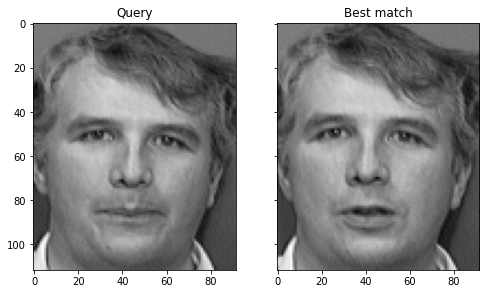

tImage shape: (112, 92)
query shape: (1, 10304)
eigen_faces shape: (190, 10304)
pca_mean shape: (10304,)
flatten_array shape: (360, 10304)
weights shape: (190, 360)
query_weight shape: (190, 1)
Best match with Euclidean distance 1419.446862


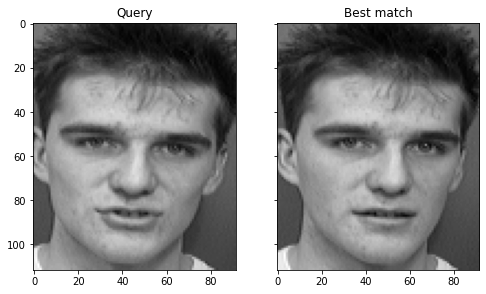

tImage shape: (112, 92)
query shape: (1, 10304)
eigen_faces shape: (190, 10304)
pca_mean shape: (10304,)
flatten_array shape: (360, 10304)
weights shape: (190, 360)
query_weight shape: (190, 1)
Best match with Euclidean distance 1668.496653


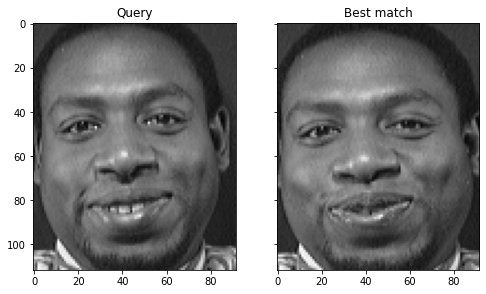

tImage shape: (112, 92)
query shape: (1, 10304)
eigen_faces shape: (190, 10304)
pca_mean shape: (10304,)
flatten_array shape: (360, 10304)
weights shape: (190, 360)
query_weight shape: (190, 1)
Best match with Euclidean distance 1629.833584


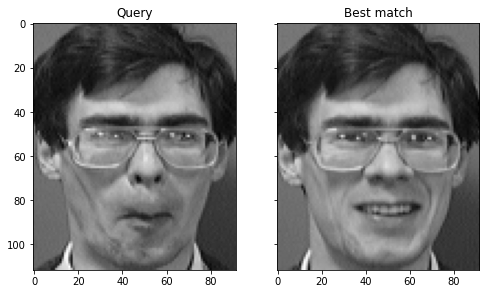

In [16]:
face_matrix = flatten_array
pca_mean = extra_eigen_vectors.mean(axis=1)
print(pca_mean.shape)
eigen_faces = extra_eigen_vectors.transpose()
print("extra_eigen_vectors : ", extra_eigen_vectors.transpose().shape)
weights = eigen_faces @ (face_matrix - pca_mean).T
test_img1 = test_data[1]
tmp_ans = face_recognition_by_norm(eigen_faces, pca_mean, flatten_array, weights, test_img1)
test_img2 = test_data[2]
tmp_ans = face_recognition_by_norm(eigen_faces, pca_mean, flatten_array, weights, test_img2)
test_img3 = test_data[3]
tmp_ans = face_recognition_by_norm(eigen_faces, pca_mean, flatten_array, weights, test_img3)
test_img4 = test_data[4]
tmp_ans = face_recognition_by_norm(eigen_faces, pca_mean, flatten_array, weights, test_img4)

In [17]:
"""
Implement pca in the following function by taking the following arguements:
1. Test image
2. Eigenvectors
3. Mean Eigen Face
4. Training Set(X_train,y_train)
The function must return the following:
1. image with smallest error
2. error value
3. prediction class
"""

def model(eigen_vec, num_component, flatten_array, tImage):
    extra_eigen_vector4, matrix_4 = get_eigen_vectors(eigen_vec,num_component)
    pca_model_mean = extra_eigen_vector4.mean(axis=1)
    eigen_faces_model = extra_eigen_vector4.transpose()
    weights = eigen_faces_model @ (flatten_array - pca_model_mean).T
    minimium_euclidean_distance = face_recognition_by_norm(eigen_faces_model, pca_model_mean, flatten_array, weights, tImage)
    return minimium_euclidean_distance

In [18]:
"""
Iterate through all the images in the test data and 
test the accurate by taking different number of components
"""
array_of_components = [50,100,200,400,600,600,1000,2000,5000,10000]
MSE_error_lst = []
test_image = np.array(test_data)
test_image = test_image.flatten()
test_image = np.reshape(test_image, (40, 10304))
for component in array_of_components:
    extra_k_eigen_vectors, matrix = get_eigen_vectors(eigen_vec,component)
    test_recreated_matrix=np.dot(test_image,extra_k_eigen_vectors)
    eucledian_distance_lst = []
    for reduces_img in test_recreated_matrix:
        eucledian_distance = np.linalg.norm(matrix - reduces_img, axis=0)
        eucledian_distance_lst.append(eucledian_distance)
    best_match_found = np.sum(np.square((np.array(eucledian_distance_lst))))
    MSE_error_lst.append(best_match_found/(40*component))
print()


(360, 50)
(360, 100)
(360, 200)
(360, 400)
(360, 600)
(360, 600)
(360, 1000)
(360, 2000)
(360, 5000)
(360, 10000)



[178959619.87509242, 96390363.13397875, 50979467.480574265, 26356089.14429093, 17592708.996929795, 17592708.996929795, 10587056.923331663, 5339054.604716349, 2192641.9455112303, 1142645.411188529]


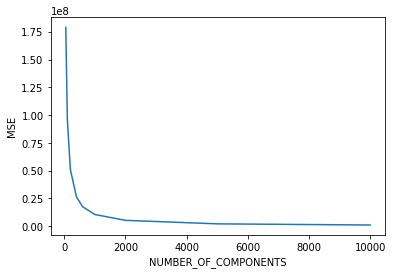

In [19]:
print(MSE_error_lst)
plt.plot(array_of_components,MSE_error_lst)
plt.xlabel('NUMBER_OF_COMPONENTS')
plt.ylabel('MSE')
plt.show()

Summarise your observations on the plots and accuracies

**Answer:**

As observed from the graph; as the number of components increases our MSE decreses.

State the advantages and limitations of using PCA in general. Also state its limitations in context of face recognition

**Answer:**

Advantages of PCA:

Dimensionality reduction: PCA can be used to reduce the number of dimensions in a dataset while preserving the most important information. This makes it easier to visualize and analyze large datasets.

Feature selection: PCA can identify the most important features in a dataset, which can be used to improve the accuracy of machine learning models.

Noise reduction: PCA can help reduce the impact of noisy or irrelevant data on the analysis of a dataset.

Visualization: PCA can be used to visualize high-dimensional data in lower-dimensional space, which can help identify patterns and relationships in the data.

Limitations of PCA:

Interpretability: The principal components produced by PCA can be difficult to interpret in real-world applications.

Information loss: PCA can result in information loss as it involves reducing the dimensionality of the data.

Computational complexity: PCA can be computationally intensive for large datasets.

Limitations of PCA in face recognition:

Variability in face images: PCA assumes that the data is linearly separable, which may not be the case for face images due to variations in lighting, pose, and expression.

Limited ability to distinguish between individuals: PCA is a linear technique and may not be able to capture the complex variations in face images that distinguish between individuals.

Vulnerability to attacks: PCA-based face recognition systems are vulnerable to attacks such as spoofing, where an imposter can deceive the system by presenting a fake face image that is similar to the original face image.